# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Ahmad Mafaza Afnani
- **Email:** mafazaafnani@student.ub.ac.id
- **ID Dicoding:** senyuminaja



## Menentukan Pertanyaan Bisnis

- Bagaimana tren jumlah penyewaan sepeda (casual dan registered) selama dua tahun terakhir?
- Pada hari apa dalam seminggu jumlah penyewaan sepeda paling banyak dan paling sedikit dalam 2 tahun terakhir?
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda dalam setiap musim?
- Seberapa besar pengaruh kelembapan dan kecepatan angin terhadap penurunan jumlah penyewaan sepeda?
- Kapan waktu paling ramai (jam) penyewaan sepeda selama dua tahun terakhir?
- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?
- Berapa rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca yang berbeda?
- Bagaimana performa penyewaan sepeda pada setiap musim?
- Apakah pengguna casual lebih banyak menyewa sepeda pada hari libur dibandingkan hari kerja?
- Berapa total sepeda yang disewa selama dua tahun terakhir oleh pengguna casual dan registered?





## Import Semua Packages/Library yang Digunakan

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [44]:
day_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/ProjectDicoding/refs/heads/master/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [45]:
hour_df = pd.read_csv('https://raw.githubusercontent.com/SenyuminAja16/ProjectDicoding/refs/heads/master/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [46]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [47]:
day_df.duplicated().sum()

0

In [48]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [49]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [50]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [51]:
hour_df.duplicated().sum()

0

In [52]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [53]:
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [54]:
datetime_columns =['dteday']
for columns in datetime_columns:
  day_df[columns] = pd.to_datetime(day_df[columns])

In [55]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [56]:
for columns in datetime_columns:
  hour_df[columns] = pd.to_datetime(hour_df[columns])

In [57]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

In [58]:
monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

monthly_rent_df.index = monthly_rent_df.index.strftime('%Y-%m')
monthly_rent_df = monthly_rent_df.reset_index()

monthly_rent_df.head()

<ipython-input-58-83c4cb727c05>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = day_df.resample(rule='M', on='dteday').agg({


,dteday,casual,registered
0,2011-01,3073,35116
1,2011-02,6242,41973
2,2011-03,12826,51219
3,2011-04,22346,72524
4,2011-05,31050,104771


In [59]:
day_df['day'] = day_df.weekday.apply(lambda x: 'Sunday' if x == 0 else ('Monday' if x == 1 else ('Tuesday' if x == 2 else ('Wednesday' if x== 3 else ('Thursday' if x == 4 else ('Friday' if x == 5 else 'Saturday'))))))
day_df.groupby(by='day').cnt.sum().sort_values(ascending=False).reset_index()

,day,cnt
0,Friday,487790
1,Thursday,485395
2,Saturday,477807
3,Wednesday,473048
4,Tuesday,469109
5,Monday,455503
6,Sunday,444027


In [60]:
hour_df['category_season'] = hour_df.season.apply(lambda x: 'Springer' if x == 1 else ('Summer' if x == 2 else ('Fall' if x == 3 else 'Winter')))

q1 = np.percentile(hour_df['temp'], 25)
q2 = np.percentile(hour_df['temp'], 50)
q3 = np.percentile(hour_df['temp'], 75)

def category_temp(temp):
  if temp < q1:
    return 'Low'
  elif temp < q2:
    return 'Medium-Low'
  elif temp < q3:
    return 'Medium-high'
  else:
    return 'High'

hour_df['category_temp'] = hour_df.temp.apply(category_temp)

hour_df.groupby(by=['category_season', 'category_temp']).cnt.sum()

category_season  category_temp
Fall             High             881072
                 Medium-Low         5402
                 Medium-high      174655
Springer         High              10101
                 Low              218014
                 Medium-Low       175811
                 Medium-high       67422
Summer           High             318115
                 Low               26521
                 Medium-Low       147915
                 Medium-high      426038
Winter           High              55196
                 Low              133986
                 Medium-Low       343807
                 Medium-high      308624
Name: cnt, dtype: int64

In [61]:
q1 = np.percentile(hour_df['hum'], 25)
q2 = np.percentile(hour_df['hum'], 50)
q3 = np.percentile(hour_df['hum'], 75)

def category_humidity(hum):
  if hum < q1:
    return 'Low Humidity'
  elif hum < q2:
    return 'Moderate Humidity'
  elif hum < q3:
    return 'High Humidity'
  else:
    return 'Very High Humidity'

hour_df['category_humidity'] = hour_df.hum.apply(category_humidity)
hour_df.groupby(by='category_humidity').cnt.sum().sort_values(ascending=False)

,cnt
category_humidity,
Low Humidity,1149467
Moderate Humidity,919852
High Humidity,696408
Very High Humidity,526952


In [62]:
q1 = np.percentile(hour_df['windspeed'], 25)
q2 = np.percentile(hour_df['windspeed'], 50)
q3 = np.percentile(hour_df['windspeed'], 75)

def category_windspeed(windspeed):
  if windspeed < q1:
    return 'Calm Wind'
  elif windspeed < q2:
    return 'Gentle Wind'
  elif windspeed < q3:
    return 'Moderate Wind'
  else:
    return 'Strong Wind'

hour_df['category_windspeed'] = hour_df.windspeed.apply(category_windspeed)
hour_df.groupby(by='category_windspeed').cnt.sum().sort_values(ascending=False)

,cnt
category_windspeed,
Strong Wind,1167345
Gentle Wind,908242
Moderate Wind,653085
Calm Wind,564007


In [63]:
day_df['year'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df.groupby(by=['year', 'mnth']).cnt.sum()

year  mnth
2011  1        38189
      2        48215
      3        64045
      4        94870
      5       135821
      6       143512
      7       141341
      8       136691
      9       127418
      10      123511
      11      102167
      12       87323
2012  1        96744
      2       103137
      3       164875
      4       174224
      5       195865
      6       202830
      7       203607
      8       214503
      9       218573
      10      198841
      11      152664
      12      123713
Name: cnt, dtype: int64

In [64]:
hour_df.groupby(by='hr').cnt.sum().sort_index()

,cnt
hr,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171
8,261001


In [65]:
hour_df['category_day'] = hour_df.workingday.apply(lambda x: 'Working day' if x == 1 else 'Holiday')
hour_df.groupby(by='category_day').cnt.sum().sort_values(ascending=False)

,cnt
category_day,
Working day,2292410
Holiday,1000269


In [66]:
hour_df.groupby(by='weathersit').cnt.mean().sort_values(ascending=False)

,cnt
weathersit,
1,204.869272
2,175.165493
3,111.579281
4,74.333333


In [67]:
hour_df.groupby(by='category_season').agg({
    'casual' : 'sum',
    'registered' : 'sum',
    'cnt' : 'sum'
})

,casual,registered,cnt
category_season,,,
Fall,226091,835038,1061129
Springer,60622,410726,471348
Summer,203522,715067,918589
Winter,129782,711831,841613


In [68]:
hour_df.groupby(by='category_day').casual.sum().sort_values(ascending=False)

,casual
category_day,
Holiday,316732
Working day,303285


In [69]:
day_df['year'] = pd.to_datetime(day_df['dteday'])
day_df['year'] = day_df['dteday'].dt.year
day_df.groupby(by='year').agg({
    'casual' : 'sum',
    'registered' : 'sum'
})

,casual,registered
year,,
2011,247252,995851
2012,372765,1676811


In [70]:
hour_day_df = pd.merge(
    left = hour_df,
    right = day_df,
    how = 'left',
    left_on = 'dteday',
    right_on= 'dteday'
)
hour_day_df

,instant_x,dteday,season_x,yr_x,mnth_x,hr,holiday_x,weekday_x,workingday_x,weathersit_x,...,weathersit_y,temp_y,atemp_y,hum_y,windspeed_y,casual_y,registered_y,cnt_y,day,year
0,1,2011-01-01,1,0,1,0,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,2011
1,2,2011-01-01,1,0,1,1,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,2011
2,3,2011-01-01,1,0,1,2,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,2011
3,4,2011-01-01,1,0,1,3,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,2011
4,5,2011-01-01,1,0,1,4,0,6,0,1,...,2,0.344167,0.363625,0.805833,0.160446,331,654,985,Saturday,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,...,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,Monday,2012
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,...,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,Monday,2012
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,...,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,Monday,2012
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,...,2,0.215833,0.223487,0.577500,0.154846,439,2290,2729,Monday,2012


## Visualization & Explanatory Analysis

### Pertanyaan 1:Bagaimana tren jumlah penyewaan sepeda (casual dan registered) selama dua tahun terakhir?


In [71]:
monthly_rent_df = hour_day_df.resample(rule='M', on='dteday').agg({
    'casual_x' : 'sum',
    'registered_x' : 'sum'
})

monthly_rent_df.index = monthly_rent_df.index.strftime('%B %Y')
monthly_rent_df = monthly_rent_df.reset_index()

<ipython-input-71-2e949ec36333>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_rent_df = hour_day_df.resample(rule='M', on='dteday').agg({


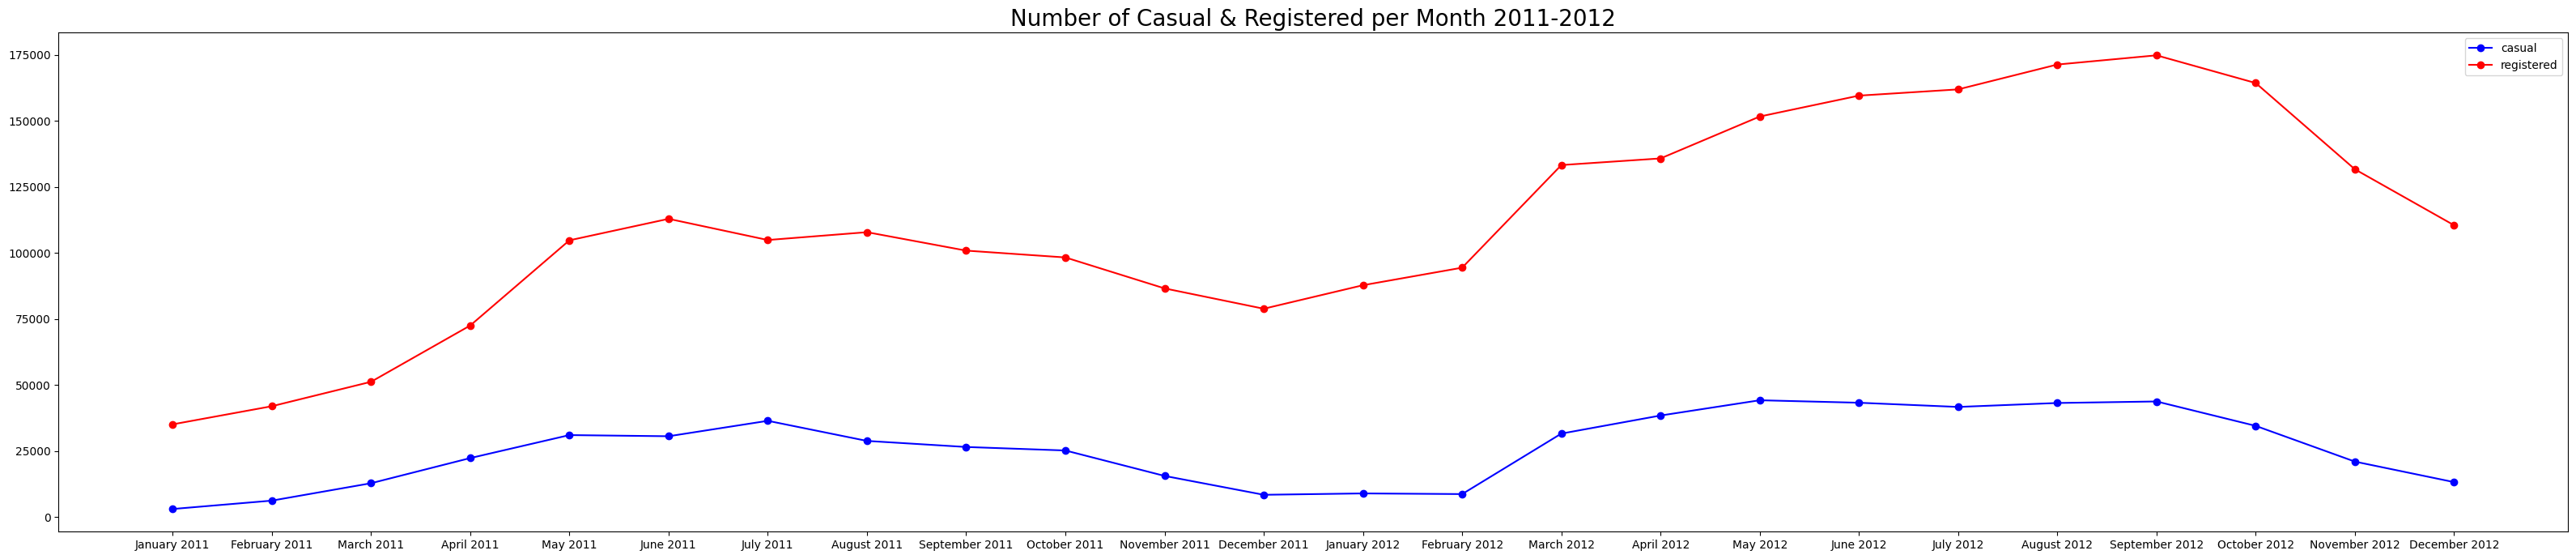

In [72]:
plt.figure(figsize=(40,8))
plt.plot(monthly_rent_df['dteday'], monthly_rent_df['casual_x'], marker='o', color="blue", label='casual')
plt.plot(monthly_rent_df['dteday'],monthly_rent_df['registered_x'], marker='o', color='red', label='registered')
plt.title('Number of Casual & Registered per Month 2011-2012', loc='center', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.legend()
plt.show()

### Pertanyaan 2:Pada hari apa dalam seminggu jumlah penyewaan sepeda paling banyak dan paling sedikit dalam 2 tahun terakhir?


<ipython-input-73-5768f4b1d2db>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_rent_df, x=day_rent_df['day'], y=day_rent_df['cnt_x'], palette=colors)


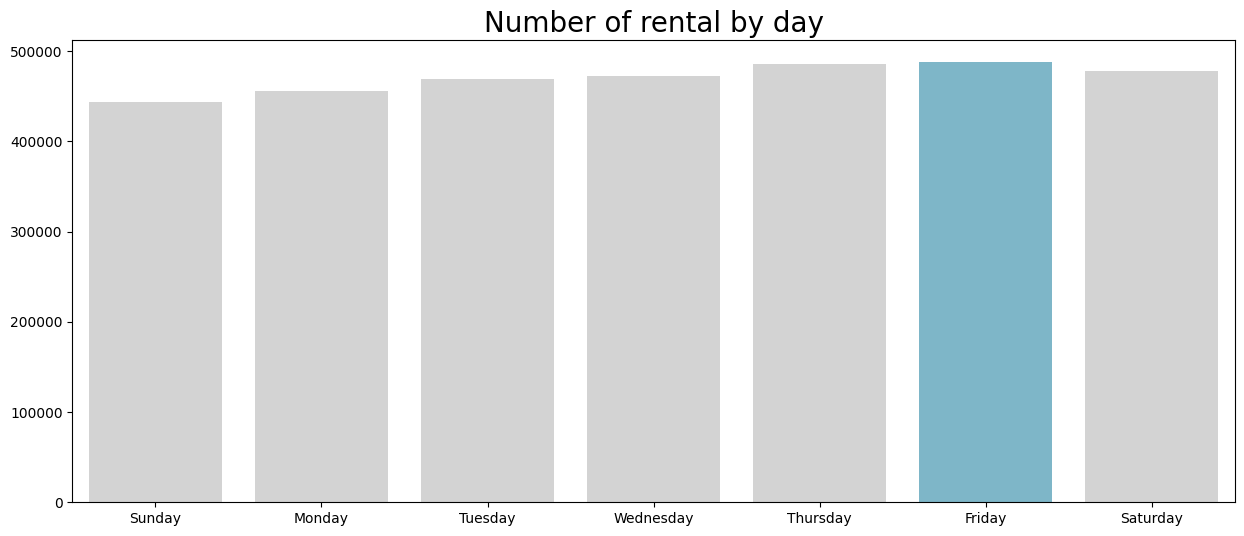

In [73]:
day_rent_df = hour_day_df.groupby(by='day').cnt_x.sum().reset_index()
day_rent_df['day'] = pd.Categorical(day_rent_df['day'], ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])
colors = ["#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3",  "#D3D3D3","#72BCD4", "#D3D3D3", ]
plt.figure(figsize=(15,6))
sns.barplot(data=day_rent_df, x=day_rent_df['day'], y=day_rent_df['cnt_x'], palette=colors)
plt.xlabel(None)
plt.ylabel(None)
plt.title('Number of rental by day', loc='center', fontsize=20)
plt.show()

### Pertanyaan 3: Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda dalam setiap musim?


<ipython-input-74-7df3bc2aec72>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bytemp_df, x=bytemp_df['category_temp'], y=bytemp_df['cnt_x'], palette=colors)
<ipython-input-74-7df3bc2aec72>:4: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=bytemp_df, x=bytemp_df['category_temp'], y=bytemp_df['cnt_x'], palette=colors)


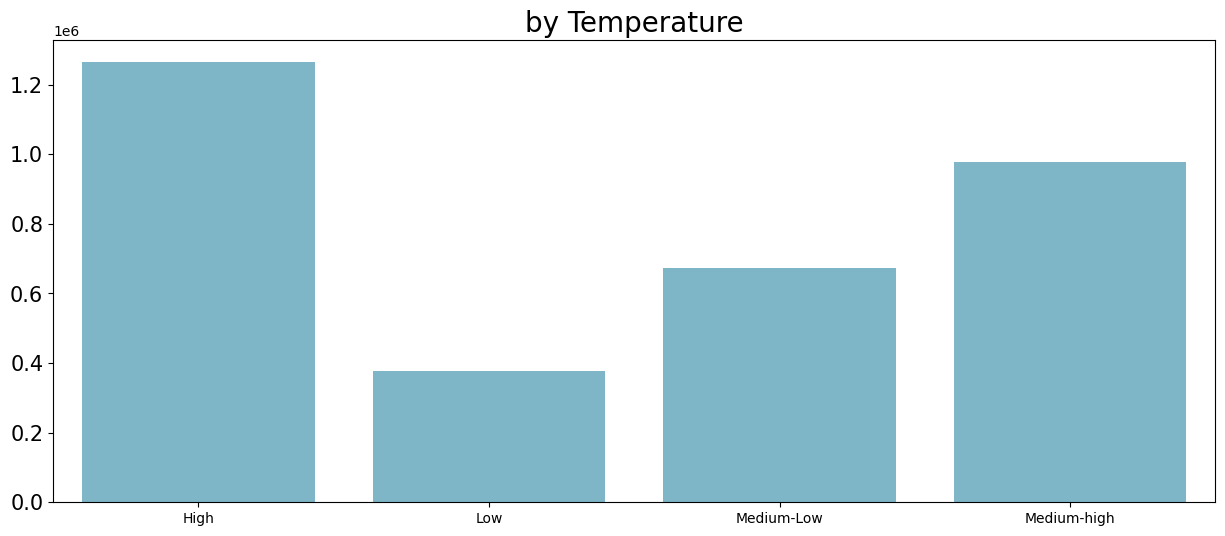

In [74]:
bytemp_df = hour_day_df.groupby(by='category_temp').cnt_x.sum().reset_index()
plt.figure(figsize=(15,6))
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
sns.barplot(data=bytemp_df, x=bytemp_df['category_temp'], y=bytemp_df['cnt_x'], palette=colors)
plt.title('by Temperature', loc='center', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='y', labelsize=15)
plt.show()

### Pertanyaan 5: Seberapa besar pengaruh kelembapan dan kecepatan angin terhadap penurunan jumlah penyewaan sepeda?


<ipython-input-75-2eee7d2ff638>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=byhumidity_df, x=byhumidity_df['category_humidity'], y=byhumidity_df['cnt_x'], palette=colors, ax=ax[0])
<ipython-input-75-2eee7d2ff638>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.barplot(data=byhumidity_df, x=byhumidity_df['category_humidity'], y=byhumidity_df['cnt_x'], palette=colors, ax=ax[0])
<ipython-input-75-2eee7d2ff638>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bywindspeed_df, x=bywindspeed_df['category_windspeed'], y=bywindspeed_df['cnt_x'], palette=colors, ax=ax[1])
<ipython-input-75-2eee7d2ff638>:11: UserWarning: The palet

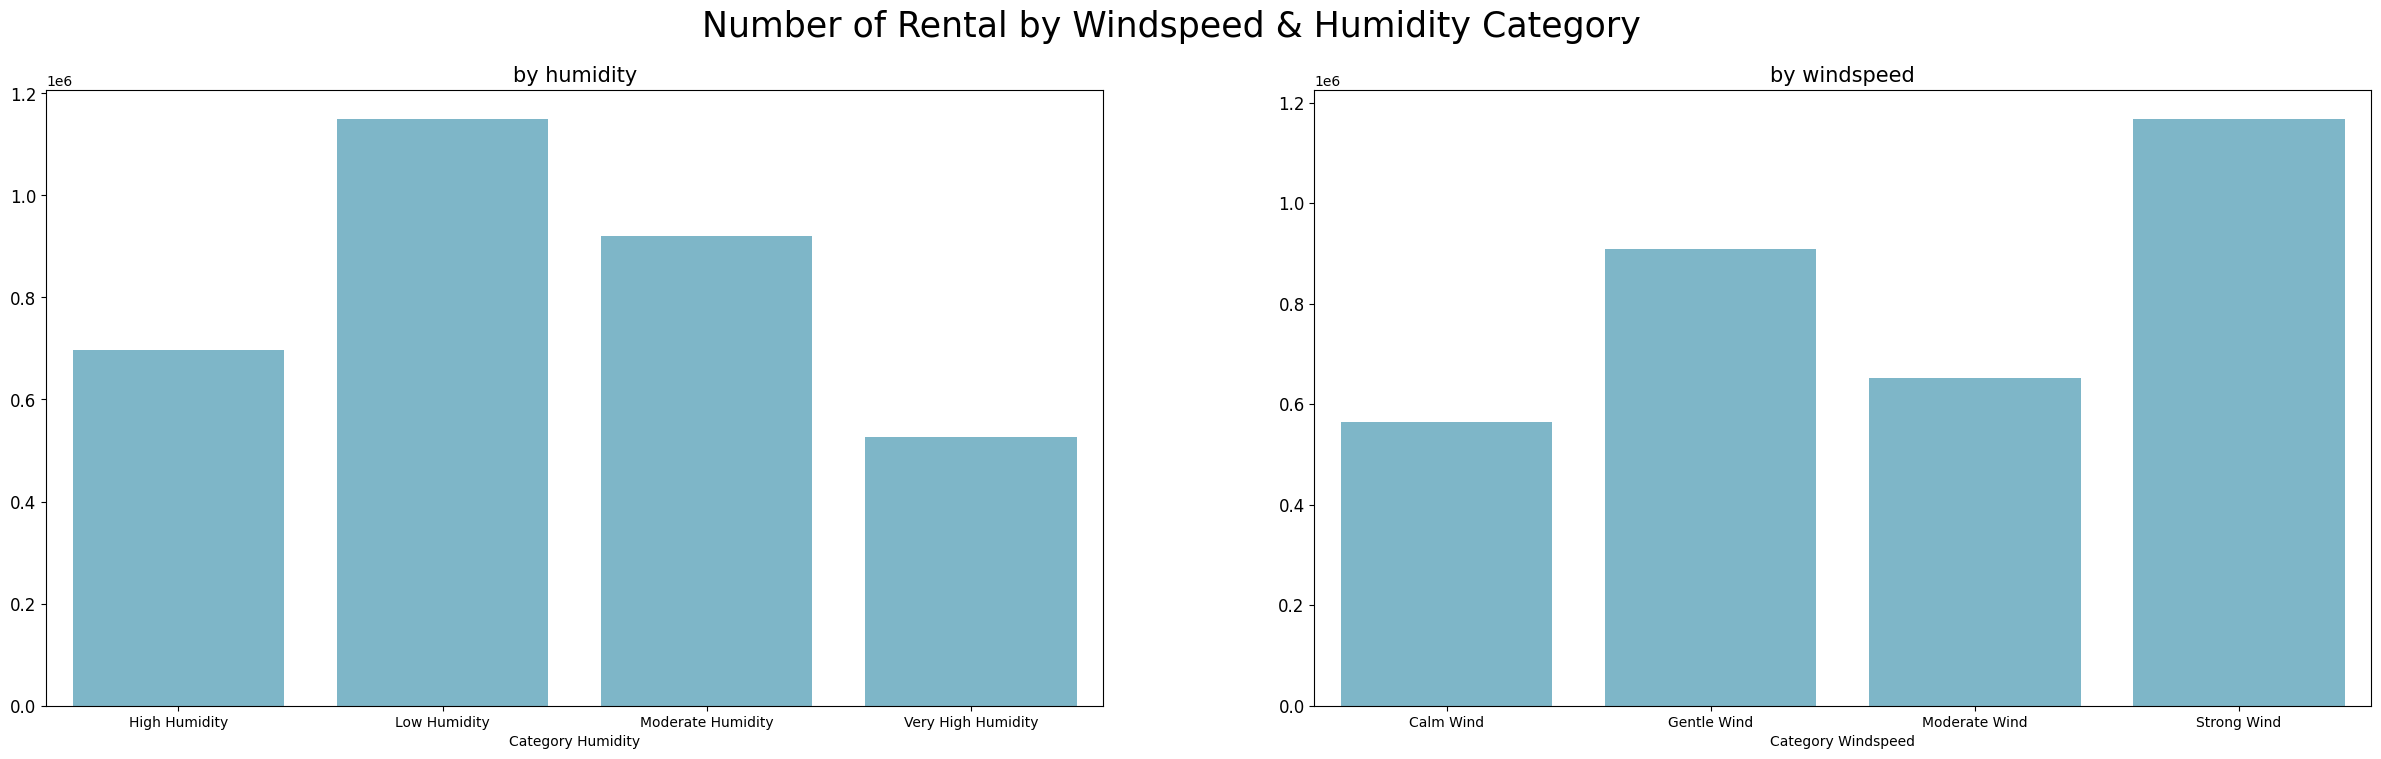

In [75]:
byhumidity_df = hour_day_df.groupby(by='category_humidity').cnt_x.sum().reset_index()
bywindspeed_df = hour_day_df.groupby(by='category_windspeed').cnt_x.sum().reset_index()

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(30,8))
sns.barplot(data=byhumidity_df, x=byhumidity_df['category_humidity'], y=byhumidity_df['cnt_x'], palette=colors, ax=ax[0])
ax[0].set_title('by humidity', loc='center', fontsize=15)
ax[0].set_xlabel('Category Humidity', fontsize=10)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='y', labelsize=12)

sns.barplot(data=bywindspeed_df, x=bywindspeed_df['category_windspeed'], y=bywindspeed_df['cnt_x'], palette=colors, ax=ax[1])
ax[1].set_title('by windspeed', loc='center', fontsize=15)
ax[1].set_xlabel('Category Windspeed', fontsize=10)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='y', labelsize=12)

plt.suptitle('Number of Rental by Windspeed & Humidity Category',  fontsize=25)
plt.show()


### Pertanyaan 6: Kapan waktu paling ramai (jam) penyewaan sepeda selama dua tahun terakhir?


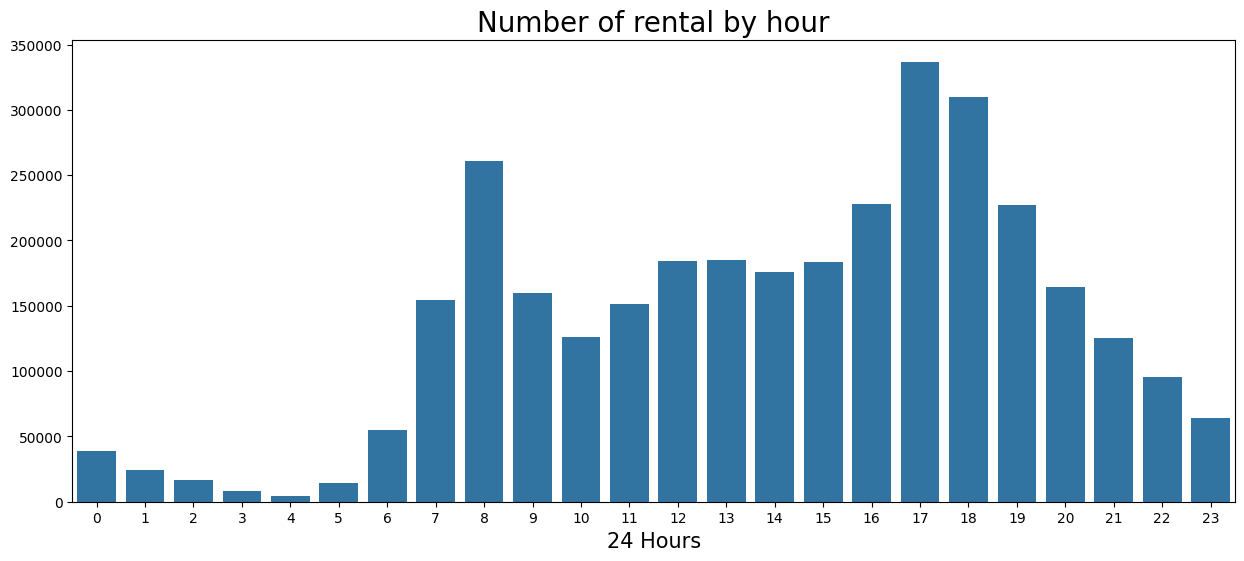

In [76]:
byhour_df = hour_day_df.groupby(by='hr').cnt_x.sum().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=byhour_df,x=byhour_df['hr'], y=byhour_df['cnt_x'])
plt.xlabel('24 Hours', loc='center', fontsize=15)
plt.ylabel(None)
plt.title('Number of rental by hour', loc='center', fontsize=20)
plt.show()


### Pertanyaan 7: Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?


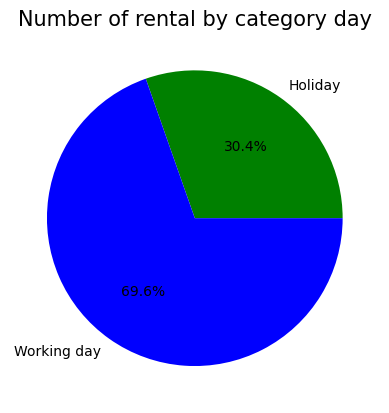

In [77]:
bycategory_day_df = hour_day_df.groupby(by='category_day').cnt_x.sum().reset_index()
color = ('green', 'blue')
plt.pie(x=bycategory_day_df['cnt_x'], labels=bycategory_day_df['category_day'], autopct="%1.1f%%", colors=color)
plt.title('Number of rental by category day', loc='center', fontsize=15)
plt.show()

### Pertanyaan 8: Berapa rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca yang berbeda?


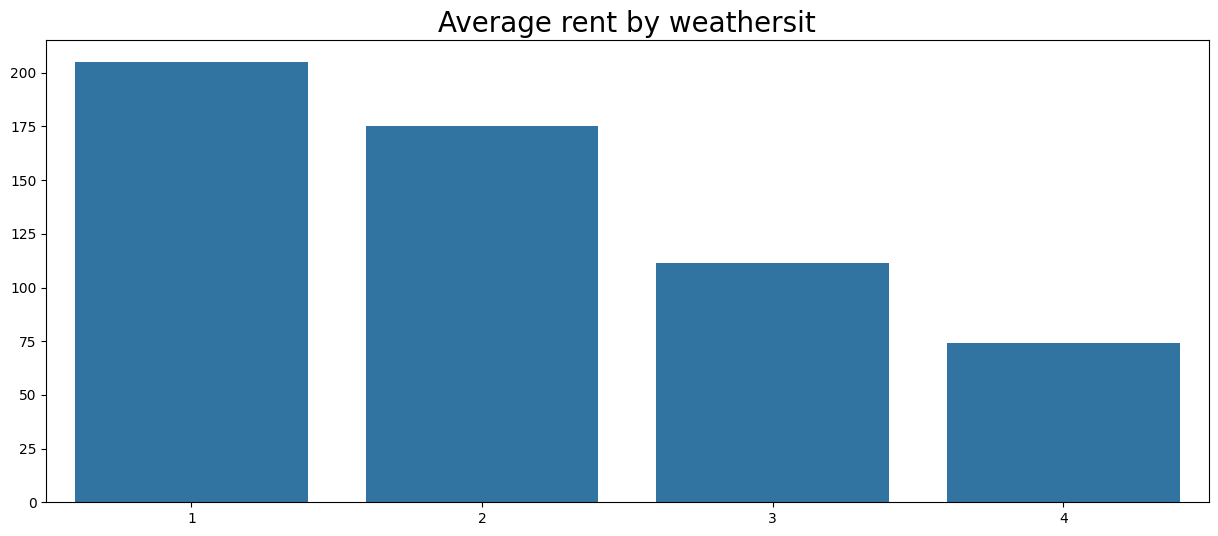

In [78]:
byweathersit_df = hour_day_df.groupby(by='weathersit_x').cnt_x.mean().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=byweathersit_df, x=byweathersit_df['weathersit_x'], y=byweathersit_df['cnt_x'])
plt.title('Average rent by weathersit', loc='center', fontsize=20)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Pertanyaan 9: Bagaimana performa penyewaan sepeda pada setiap musim?


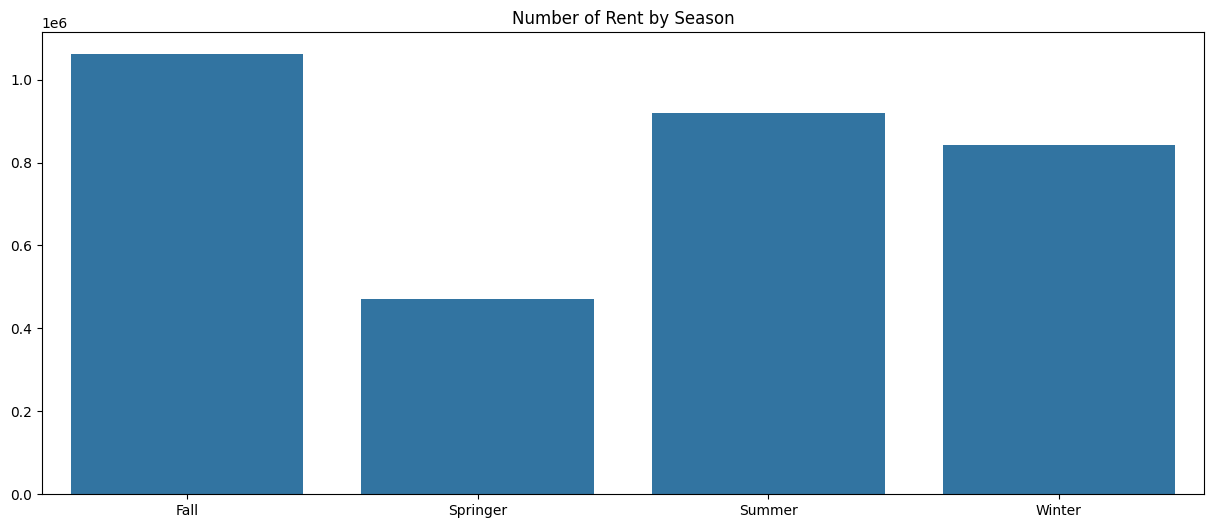

In [79]:
byseason_df = hour_day_df.groupby(by='category_season').cnt_x.sum().reset_index()
plt.figure(figsize=(15,6))
sns.barplot(data=byseason_df, x=byseason_df['category_season'], y=byseason_df['cnt_x'])
plt.title('Number of Rent by Season')
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Pertanyaan 10: Apakah pengguna casual dan reistered lebih banyak menyewa sepeda pada hari libur dibandingkan hari kerja?

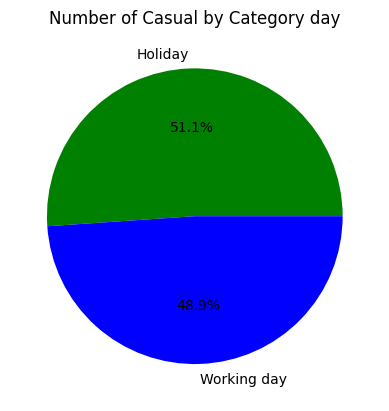

In [80]:
diferent_bycategory_day_df = hour_day_df.groupby(by='category_day').agg({
    'casual_x': 'sum',
    'registered_x' : 'sum'
}).reset_index()


color = ('green', 'blue')
plt.pie(x=diferent_bycategory_day_df['casual_x'], labels=diferent_bycategory_day_df['category_day'], autopct='%1.1f%%', colors=color)
plt.title("Number of Casual by Category day")
plt.show()

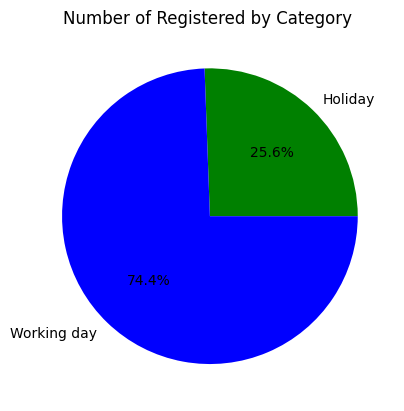

In [81]:
plt.pie(x=diferent_bycategory_day_df['registered_x'], labels=diferent_bycategory_day_df['category_day'], autopct='%1.1f%%', colors=color)
plt.title("Number of Registered by Category ")
plt.show()

### Berapa total sepeda yang disewa selama dua tahun terakhir oleh pengguna casual dan registered?

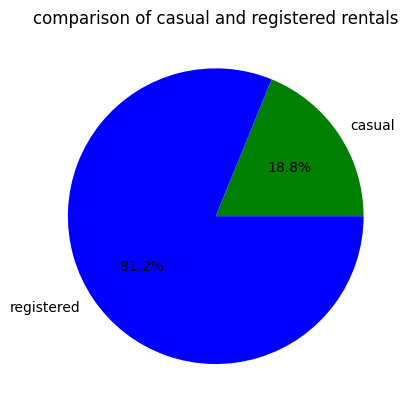

In [82]:
total_casual_rent = hour_day_df.casual_x.sum()
total_registered_rent = hour_day_df.registered_x.sum()
plt.pie(
    x = [total_casual_rent, total_registered_rent],
    labels= ['casual', 'registered'],
    autopct= '%1.1f%%',
    colors=color
)

plt.title('comparison of casual and registered rentals')
plt.show()

**Insight:**
- xxx
- xxx

## Analisis Lanjutan (Opsional)

In [83]:
hour_day_df.to_csv('hour_day_df.csv', index=False)

## Conclusion

- Bagaimana tren jumlah penyewaan sepeda (casual dan registered) selama dua tahun terakhir?

Tren Jumlah Penyewaan sepeda (casual dan registered) selama dua tahun terakhir memmiliki pola yang hampir sama. keduanya sama sama memiliki penurunan pada awal tahun dan menjelang akhir tahun akhir tahun. hal ini mungkin disebabkan musim dingin yang terjadi di akhir hingga awal tahun.
- Pada hari apa dalam seminggu jumlah penyewaan sepeda paling banyak dan paling sedikit dalam 2 tahun terakhir?

Dalam seminggu jumlah penyewaan sepeda paling banyak terdapat pada hari jum'at, mungkin disebabkan karena hari jum'at merupakan hari menjelang akhir pekan.
- Bagaimana pengaruh suhu terhadap jumlah penyewaan sepeda dalam setiap musim?

Berdasarkan dari grafik batang yang telah dibuat suhu sangat berpanguruh pada jumlah penyewaan sepeda, dimana orang lebih sering bersepada pada suhu dengan kategori High.
- Seberapa besar pengaruh kelembapan dan kecepatan angin terhadap penurunan jumlah penyewaan sepeda?

Berdasarkan dari grafik batang yang telah dibuat suhu sangat berpanguruh pada jumlah penyewaan sepeda, dimana orang lebih sering bersepada pada suhu dengan Low humidity.

- Kapan waktu paling ramai (jam) penyewaan sepeda selama dua tahun terakhir?

Berdasarkan grafik waktu yang paling sering orang sewa sepeda adalah pada jam 17.00.
- Apakah ada perbedaan signifikan dalam jumlah penyewaan sepeda pada hari kerja dan hari libur?
perbedaan antara jumlah penyewaan pada hari kerja dan hari libur cukup signifikan. dimana pada hari kerja memiliki persentase 69,6, sedangkan hari libur memiliki persentase 30,4%, namun dalam hal ini bukan berarti pada hari libur jumlah sewa menjadi sepi engingat hari kerja yang lebih banyak daripada hari libur.
- Berapa rata-rata jumlah penyewaan sepeda berdasarkan kondisi cuaca yang berbeda?

cuaca kategori 1: 204.869272
Cuaca kategori 2:	175.165493
Cuaca kategori 3:	111.579281
Cuaca kategori 4:	74.333333
- Bagaimana performa penyewaan sepeda pada setiap musim?

Performaa penyewaan sepeda pada setiap musim berbeda beda, dimana orang lebih banyak sewa sepeda pada musim gugur, dan pling sedikit pada musim semi selama 2 tahun terakhir.

- Apakah pengguna casual dan registered lebih banyak menyewa sepeda pada hari libur dibandingkan hari kerja?

pada pengguna casual lebih banyak sewa sepeda pada hari libur dibandingkan dengan hari kerja, walaupun perbedaannya tipis, namunpada pengguna registered lebih banyak sewa pada hari kerja dibandingkan pada hari libur.

- Berapa total sepeda yang disewa selama dua tahun terakhir oleh pengguna casual dan registered?

pada tahun 2011 jumlah casual 247252 sedngkan registered 995851, pada 2012 jumlah pengguna casual 372765 dan pengguna registered 1676811 hal ini menunjukan bahwa pengguna regitered selalu mendomonasi dalam 2 tahun terakhir
